In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('obsmat.txt', sep='  ', header=None, names=['frame_number', 'pedestrian_ID', 'pos_x', 'pos_z', 'pos_y', 'v_x', 'v_z', 'v_y'])
groups=pd.read_csv('groups.txt',sep=' ', names=['a','b','c','d','e','f'])

In [3]:
data['group_size'] = 0
data['group_number'] = 0
groups['a']=groups['a'].astype(float)
groups['b']=groups['b'].astype(float)
groups['group_size'] =  groups.apply(lambda x: 6 - (x.isnull().sum()), axis='columns')
groups['group_number'] = range(1,len(groups)+1)
data = data.drop(['pos_z', 'v_z'], axis=1)

In [4]:
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_size'][i] = groups['group_size'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_size'][i] = groups['group_size'][j]

            
for i in range(len(data)):
    for j in range(len(groups)):
        if data.pedestrian_ID[i] == groups.a[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.b[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.c[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.d[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.e[j]:
            data['group_number'][i] = groups['group_number'][j]
        elif data.pedestrian_ID[i] == groups.f[j]:
            data['group_number'][i] = groups['group_number'][j]

In [5]:
data['centroid_x'] = 0.0
data['centroid_y'] = 0.0


In [6]:
data.loc[data['group_number']==2]['pedestrian_ID'].unique()

array([2., 3., 6.])

In [7]:
data[data['group_size'] == 5]['group_number'].unique()

array([51, 52, 53], dtype=int64)

In [8]:
frames = data['frame_number'].unique().tolist()

In [9]:
for i in frames:
    grouped = data[data['frame_number'] == i].groupby('group_number').mean()
    grouped = grouped.reset_index()
    for j in grouped.group_number.tolist():
        data.loc[(data.frame_number == i) & (data.group_number == j),'centroid_x']=grouped[grouped['group_number'] == j]['pos_x'].item()
        data.loc[(data.frame_number == i) & (data.group_number == j),'centroid_y']=grouped[grouped['group_number'] == j]['pos_y'].item()
        data.loc[data['group_number'] == 0, 'centroid_x'] = 0
        data.loc[data['group_number'] == 0, 'centroid_y'] = 0

In [10]:
data['dist_x'] = np.abs(data['centroid_x'] - data['pos_x'])
data['dist_y'] = np.abs(data['centroid_y'] - data['pos_y'])
data.loc[data['group_number'] == 0, 'dist_x'] = 0
data.loc[data['group_number'] == 0, 'dist_y'] = 0



In [11]:
data['new_pos_x'] = data['pos_x'] - data['centroid_x']
data['new_pos_y'] = data['pos_y'] - data['centroid_y'] 
data.loc[data['group_number'] == 0, 'new_pos_x'] = 0
data.loc[data['group_number'] == 0, 'new_pos_y'] = 0

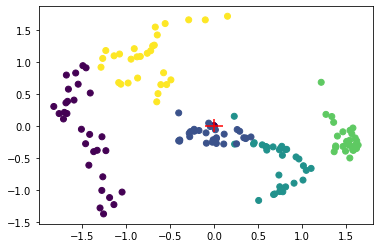

In [12]:
num = 52
plt.scatter(data[data['group_number'] == num]['new_pos_y'],data[data['group_number'] == num]['new_pos_x'],c = data[data['group_number'] == num]['pedestrian_ID'])
plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')

plt.show()

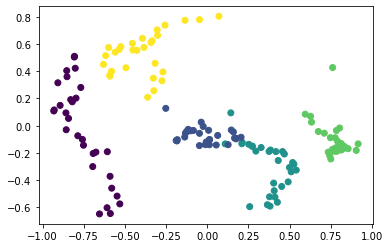

In [13]:

group_number = 52

subset = data[data['group_number']==group_number]
ped = subset['pedestrian_ID'].unique().tolist()
subset['new_pos_xx'] = 0
subset['new_pos_yy'] = 0

for i in subset['frame_number'].unique().tolist():
    max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
    max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
    r = np.sqrt((max_x**2)+(max_y**2))
    for j in ped:
        
        subset.loc[(subset['frame_number'] == i) & (subset['pedestrian_ID'] == j), 'new_pos_xx'] = subset[(subset['frame_number'] == i) & (subset['pedestrian_ID'] == j)]['new_pos_x'].div(r)
        subset.loc[(subset['frame_number'] == i) & (subset['pedestrian_ID'] == j), 'new_pos_yy'] = subset[(subset['frame_number'] == i) & (subset['pedestrian_ID'] == j)]['new_pos_y'].div(r)
        
plt.scatter(subset['new_pos_yy'],subset['new_pos_xx'],c = subset[subset['group_number'] == group_number]['pedestrian_ID'])
 


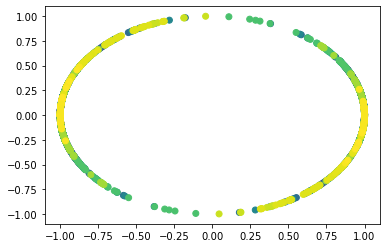

In [14]:
size =  2
grouped = data[data['group_size'] == size]
group_number = grouped['group_number'].unique().tolist()
grouped['new_pos_xx'] = 0
grouped['new_pos_yy'] = 0


for k in group_number:
    subset = grouped[grouped['group_number']==k]

    ped = subset['pedestrian_ID'].unique().tolist()
    for i in subset['frame_number'].unique().tolist():
        max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
        max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
        r = np.sqrt((max_x**2)+(max_y**2))
        for j in ped:

            grouped.loc[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k), 'new_pos_xx'] = grouped[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k)]['new_pos_x'].div(r)
            grouped.loc[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k), 'new_pos_yy'] = grouped[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k)]['new_pos_y'].div(r)
        
plt.scatter(grouped['new_pos_yy'],grouped['new_pos_xx'],c = grouped['pedestrian_ID'])

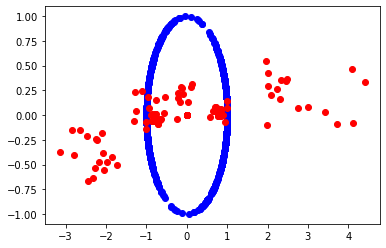

In [15]:
size =  2
grouped = data[data['group_size'] == size]
group_number = grouped['group_number'].unique().tolist()
data['new_pos_xx'] = 0
data['new_pos_yy'] = 0
ds = pd.DataFrame()

for k in group_number:
    subset = grouped[grouped['group_number']==k]
    frames = grouped[grouped['group_number']==k]['frame_number'].unique().tolist()
    others = data[(data['group_number'] != k) & ( data['frame_number'].isin(frames))]
    ped = subset['pedestrian_ID'].unique().tolist()
    ped_others = others['pedestrian_ID'].unique().tolist()
    
    for i in subset['frame_number'].unique().tolist():
        max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
        max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
        r = np.sqrt((max_x**2)+(max_y**2))
        for j in ped:

            grouped.loc[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k), 'new_pos_xx'] = grouped[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k)]['new_pos_x'].div(r)
            grouped.loc[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k), 'new_pos_yy'] = grouped[(grouped['frame_number'] == i) & (grouped['pedestrian_ID'] == j) & (grouped['group_number'] == k)]['new_pos_y'].div(r)
        for j in ped_others:

            others.loc[(others['frame_number'] == i) & (others['pedestrian_ID'] == j) & (others['group_number'] != k), 'new_pos_xx'] = others[(others['frame_number'] == i) & (others['pedestrian_ID'] == j) & (others['group_number'] != k)]['new_pos_x'].div(r)
            others.loc[(others['frame_number'] == i) & (others['pedestrian_ID'] == j) & (others['group_number'] != k), 'new_pos_yy'] = others[(others['frame_number'] == i) & (others['pedestrian_ID'] == j) & (others['group_number'] != k)]['new_pos_y'].div(r)
    ds.append(others)
plt.scatter(grouped['new_pos_yy'],grouped['new_pos_xx'],c = 'blue')
plt.scatter(others['new_pos_yy'],others['new_pos_xx'],c = 'red')

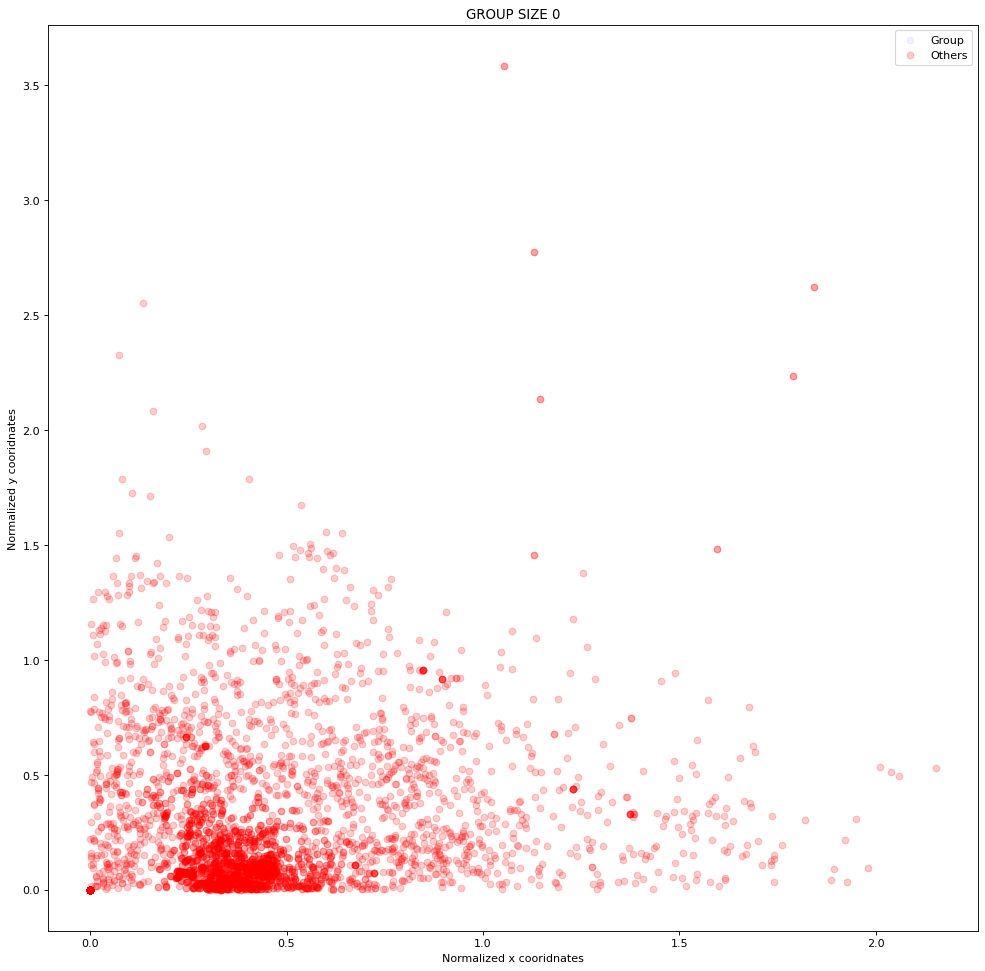

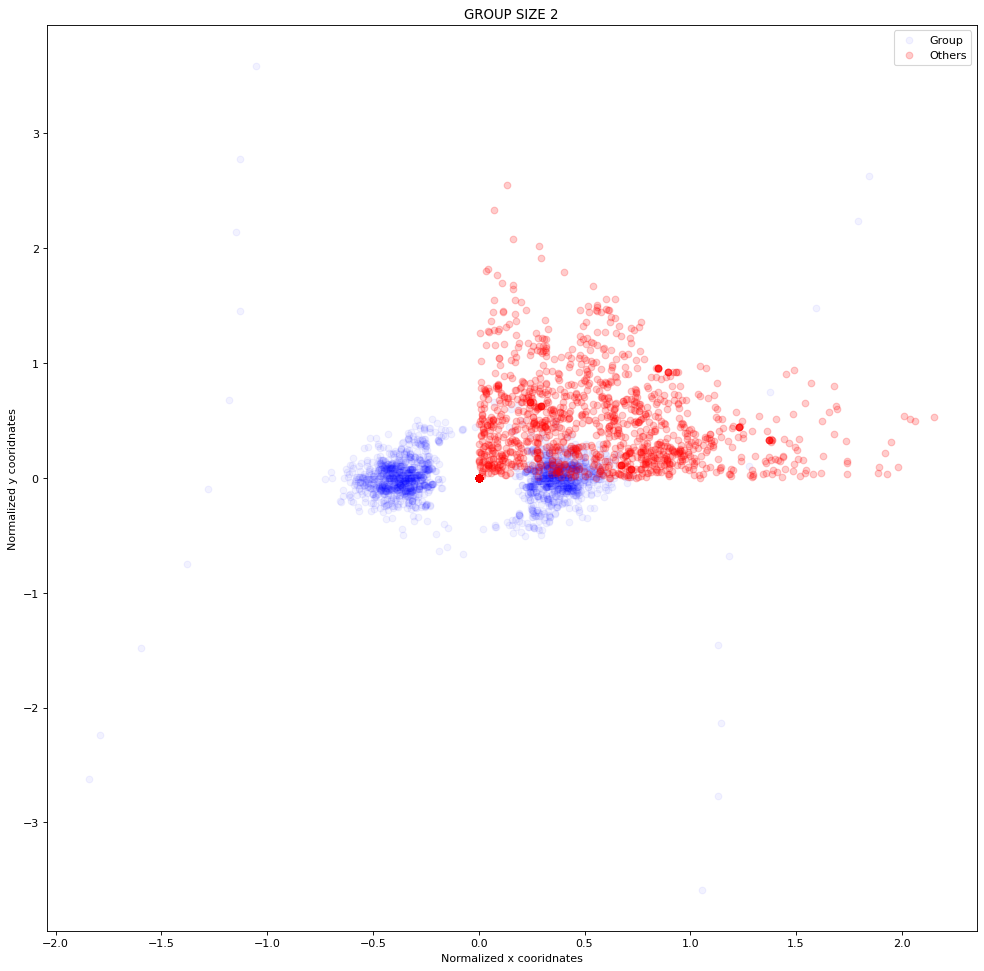

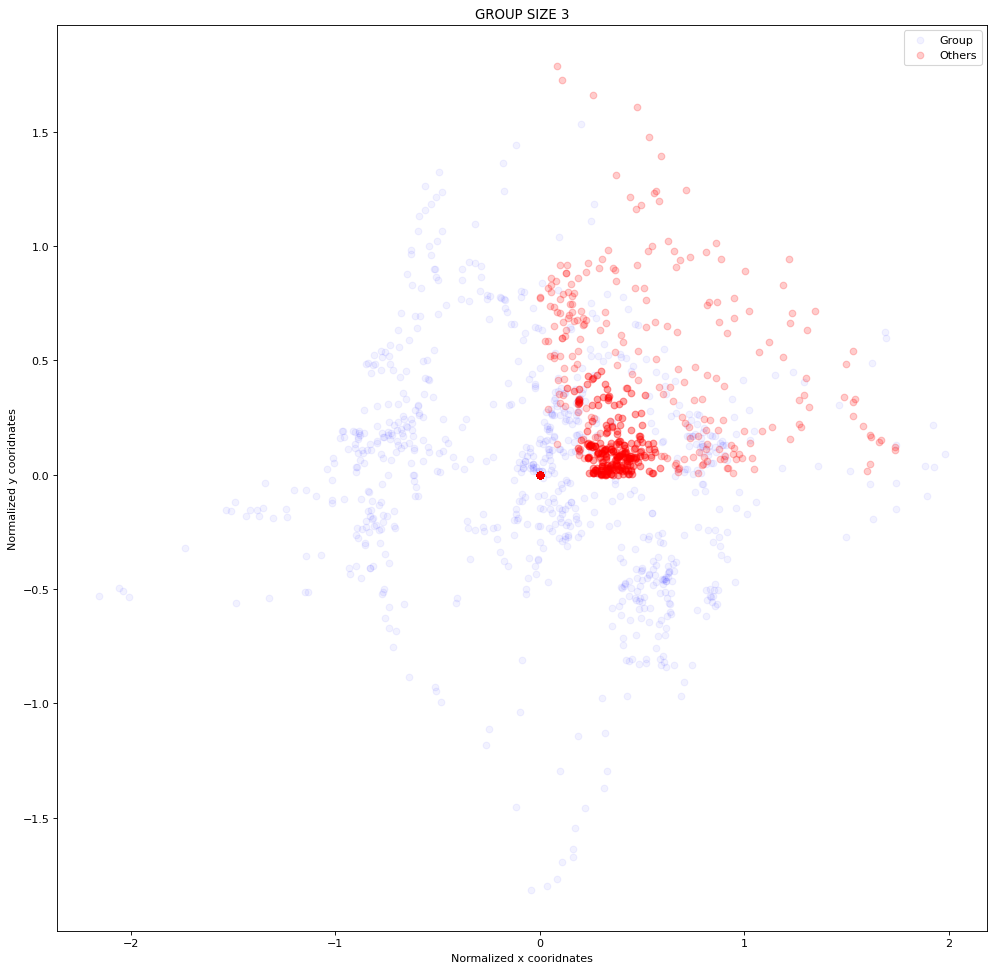

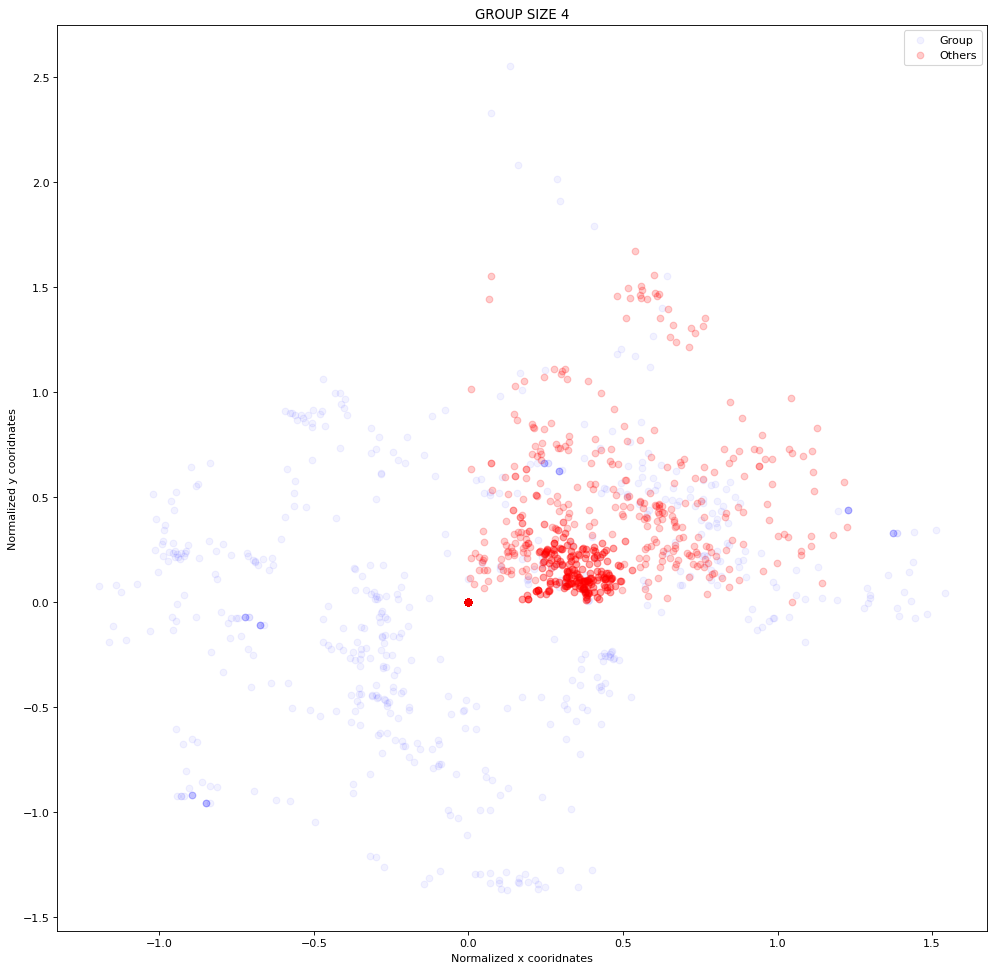

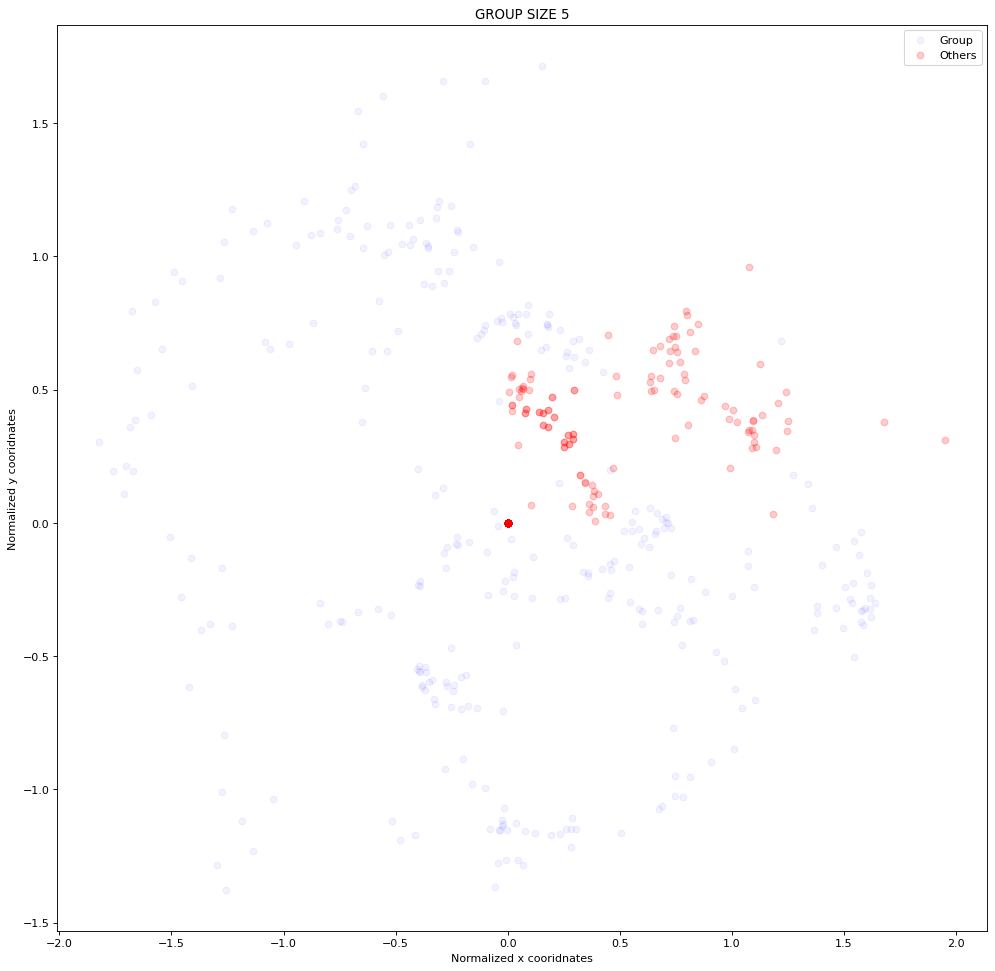

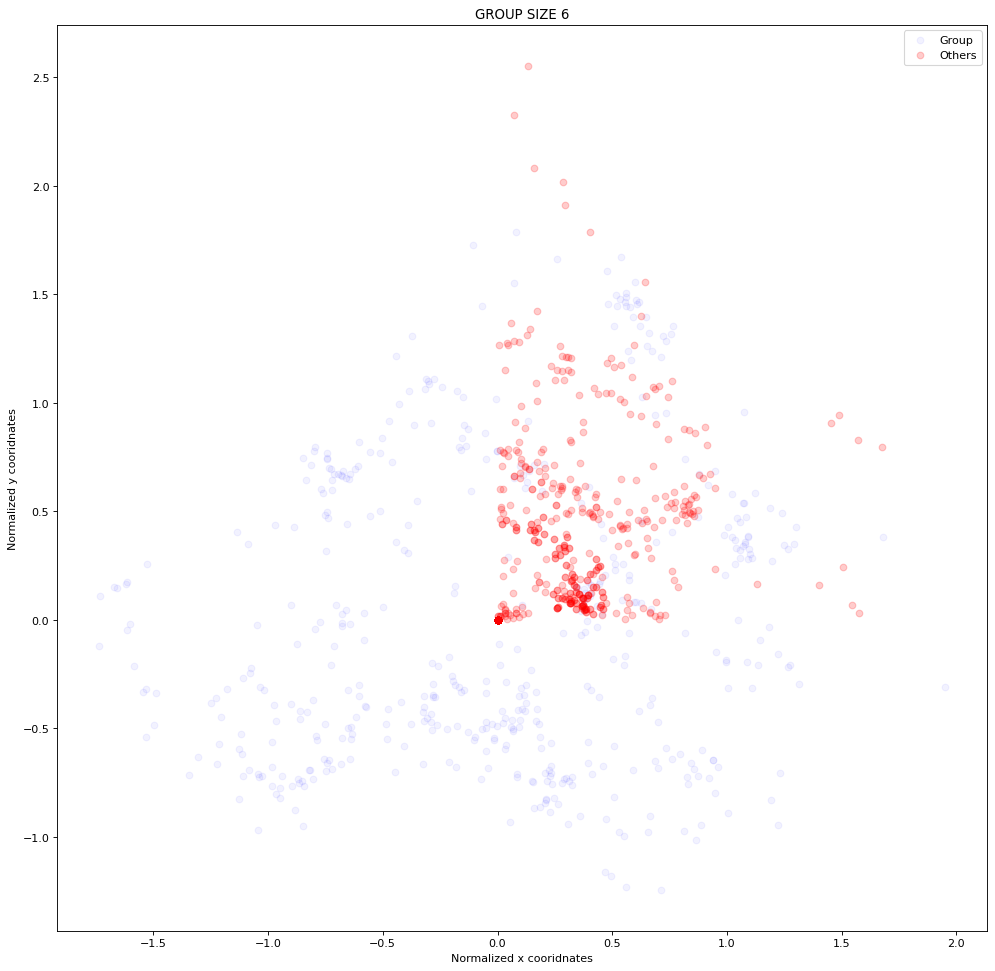

In [16]:
sizes = [0,2,3,4,5,6]

for num in sizes:

    frames = data[data['group_size'] == num]['frame_number'].unique().tolist()
    df = data[data['frame_number'].isin(frames)]
    plt.figure(figsize=(15, 15), dpi=80)
    plt.scatter(df[df['group_size'] == num]['new_pos_y'],df[data['group_size'] == num]['new_pos_x'],c = 'blue', label = 'Group',alpha = 0.05)
    plt.scatter(df[df['group_size'] != num]['dist_y'],df[data['group_size'] != num]['dist_x'],c = 'red', label = 'Others', alpha = 0.2) 
    '''plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
    plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')'''
      
    plt.legend()
    plt.xlabel('Normalized x cooridnates')
    plt.ylabel('Normalized y cooridnates')
    plt.title('GROUP SIZE '+ str(num))
    plt.show()

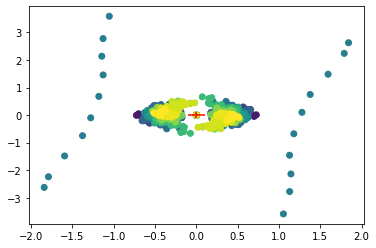

In [17]:
num = 2
plt.scatter(data[data['group_size'] == num]['new_pos_y'],data[data['group_size'] == num]['new_pos_x'],c = data[data['group_size'] == num]['group_number'])
plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')
plt.show()

def plot_normlized_centroid_per_group_size(group_size):
    df = data[data['group_size']== group_size] #df of all groups of the same size
    group_id = df['group_number'].unique().tolist() #groups ids that have the same size 
    px =[]
    py = []
    oth
    for i in group_id: #for a group of the given size
        frames_of_group = df[df['group_number']== i]['frame_number'].unique().tolist() #find the frames of the group appearance
        for j in frames_of_group: # for each frame the group is in
            centroid_x_in_frame  = df[(df['frame_number'] == j) & (df['group_number'] == i)]['centroid_x'].unique().tolist()
            centroid_y_in_frame  = df[(df['frame_number'] == j) & (df['group_number'] == i)]['centroid_y'].unique().tolist()
            #centroid of the group in the time frame
            others = data[(data['frame_number'] == j) & (data['group_number'] != i)]
            #non group members appearing in the same frame
            others['dist_x'] = others['pos_x'] - centroid_x_in_frame 
            others['dist_y'] = others['pos_x'] - centroid_y_in_frame
            data.loc[ data[“column_name”] == “some_value”, “column_name”] = “value”
            
    return()
    

In [18]:

group_id = data['group_number'].unique().tolist()


df1 = pd.DataFrame()

for i in group_id:
    frames_of_group = data[data['group_number']== i]['frame_number'].unique().tolist()
    for j in frames_of_group:
        centroid_x_in_frame  = data[(data['frame_number'] == j) & (data['group_number'] == i)]['centroid_x'].unique().tolist()
        centroid_y_in_frame  = data[(data['frame_number'] == j) & (data['group_number'] == i)]['centroid_y'].unique().tolist()
        others = data[(data['frame_number'] == j) & (data['group_number'] != i)]
        others['dist_x'] = others['pos_x'] - centroid_x_in_frame
        others['dist_y'] = others['pos_y'] - centroid_y_in_frame
        mapper_x = dict(zip(others['pedestrian_ID'], others['dist_x']))
        mapper_y = dict(zip(others['pedestrian_ID'], others['dist_y']))
        data.loc[data['frame_number'] == j,'dist_x'] = data['pedestrian_ID'].map(mapper_x)
        data.loc[data['frame_number'] == j,'dist_y'] = data['pedestrian_ID'].map(mapper_y)

In [19]:
data

,frame_number,pedestrian_ID,pos_x,pos_y,v_x,v_y,group_size,group_number,centroid_x,centroid_y,dist_x,dist_y,new_pos_x,new_pos_y,new_pos_xx,new_pos_yy
0,780.0,1.0,8.456844,3.588066,1.671714,0.176292,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0
1,786.0,1.0,9.125530,3.658583,1.662877,0.326723,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0
2,792.0,1.0,9.787146,3.849445,1.683334,0.371084,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0
3,798.0,1.0,10.472197,3.955450,1.598568,0.264795,0,0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0,0
4,804.0,1.0,11.066000,4.061280,1.574526,0.456390,0,0,0.000000,0.000000,-1.951548,-1.721311,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,12381.0,357.0,10.449366,6.229233,0.596406,0.066591,2,58,10.420920,6.487970,-1.953790,0.739933,0.028446,-0.258737,0,0
8904,12381.0,367.0,11.201661,8.443910,0.000000,0.000000,0,0,0.000000,0.000000,-1.201495,2.954611,0.000000,0.000000,0,0
8905,12381.0,366.0,12.132311,6.984982,0.733247,-0.531564,3,61,12.403156,5.489299,NaN,NaN,-0.270845,1.495683,0,0
8906,12381.0,364.0,12.369087,4.146375,1.139005,0.166531,3,61,12.403156,5.489299,NaN,NaN,-0.034069,-1.342924,0,0


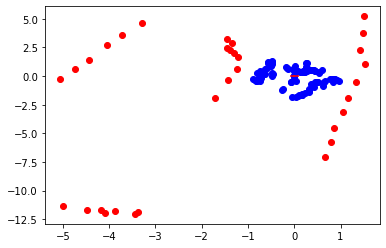

In [20]:
num = 2

frames = data[data['group_number'] == num]['frame_number'].unique().tolist()
df = data[data['frame_number'].isin(frames)]
plt.scatter(df[df['group_number'] == num]['new_pos_y'],df[data['group_number'] == num]['new_pos_x'],c = 'blue')
plt.scatter(df[df['group_number'] != num]['dist_y'],df[data['group_number'] != num]['dist_x'],c = 'red') 
plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')
plt.show()

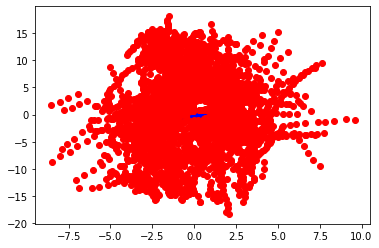

In [21]:
num = 2

frames = data[data['group_size'] == num]['frame_number'].unique().tolist()
df = data[data['frame_number'].isin(frames)]
plt.scatter(df[df['group_size'] == num]['new_pos_y'],df[data['group_size'] == num]['new_pos_x'],c = 'blue')
plt.scatter(df[df['group_size'] != num]['dist_y'],df[data['group_size'] != num]['dist_x'],c = 'red') 
'''plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')'''
plt.show()

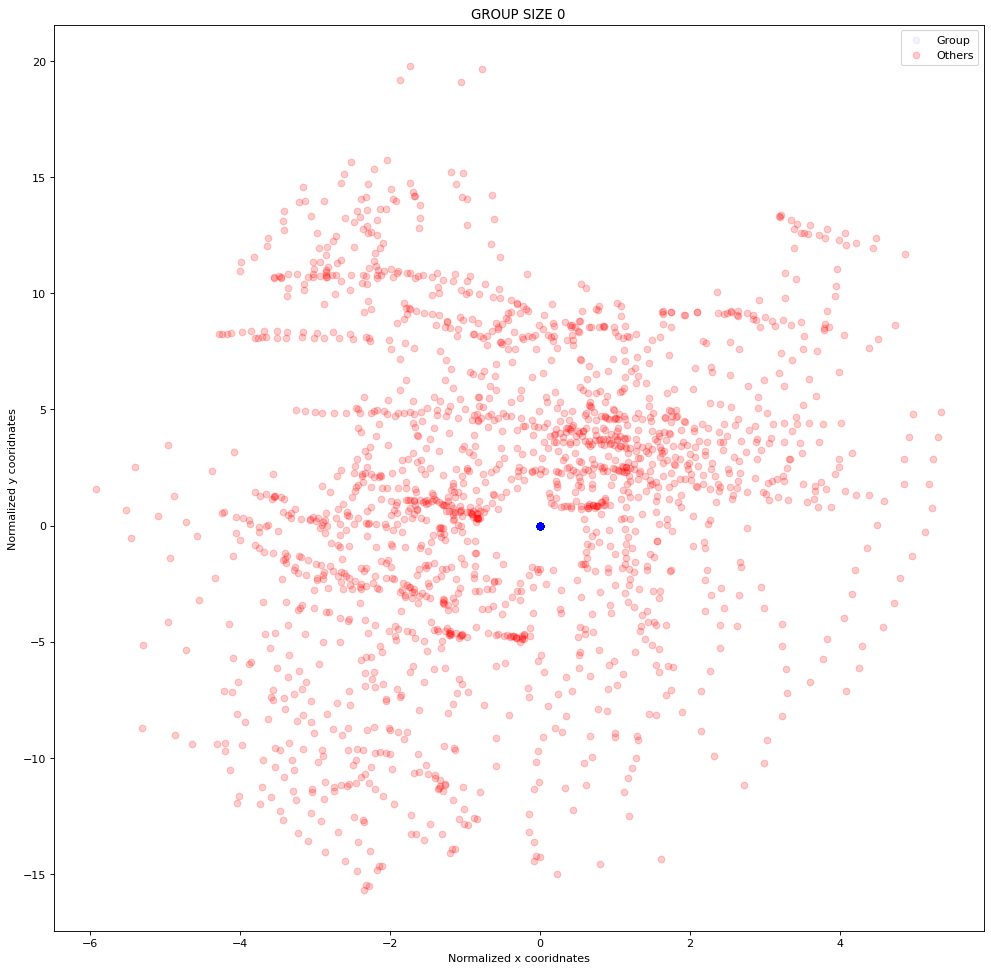

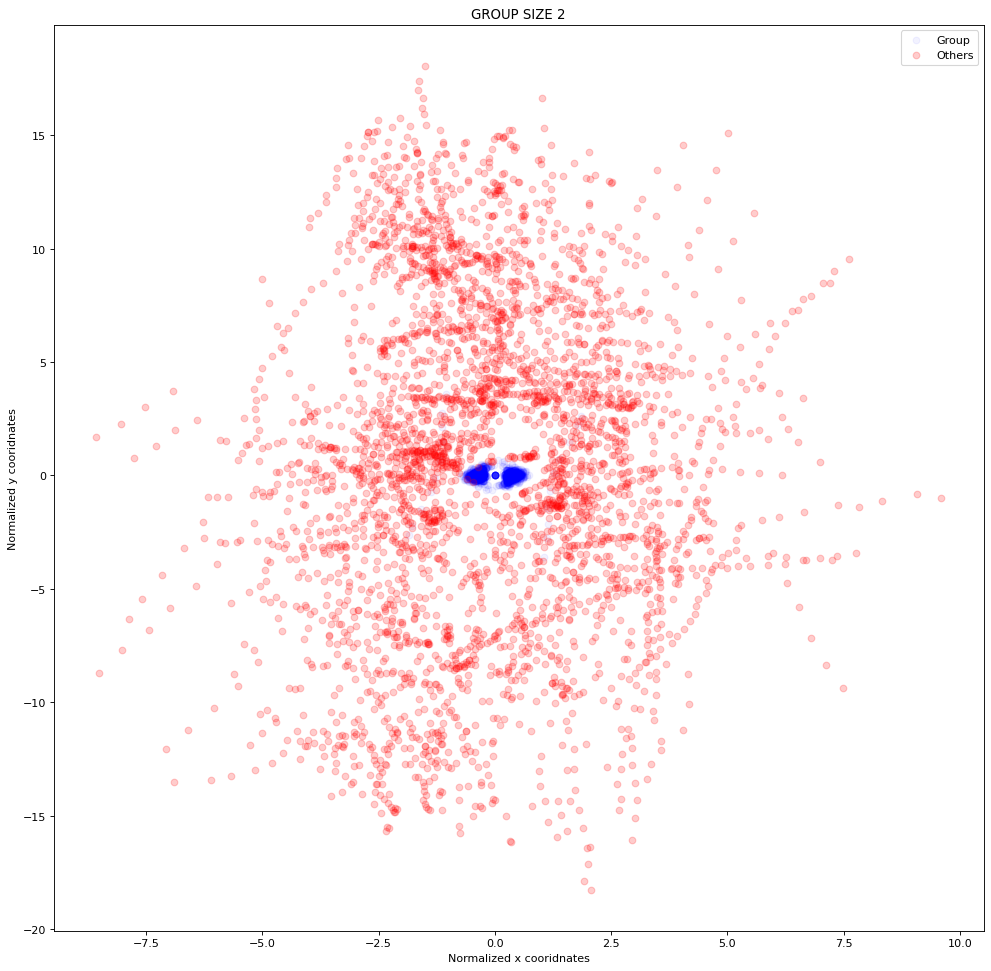

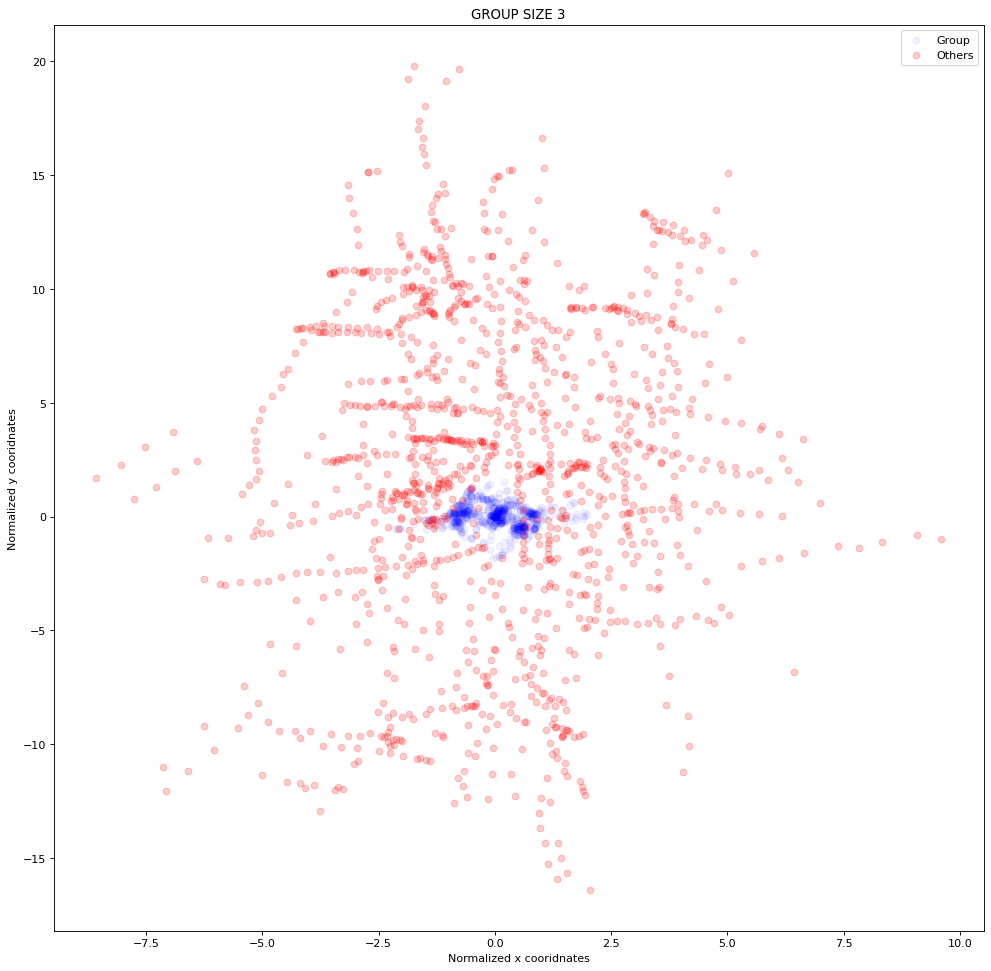

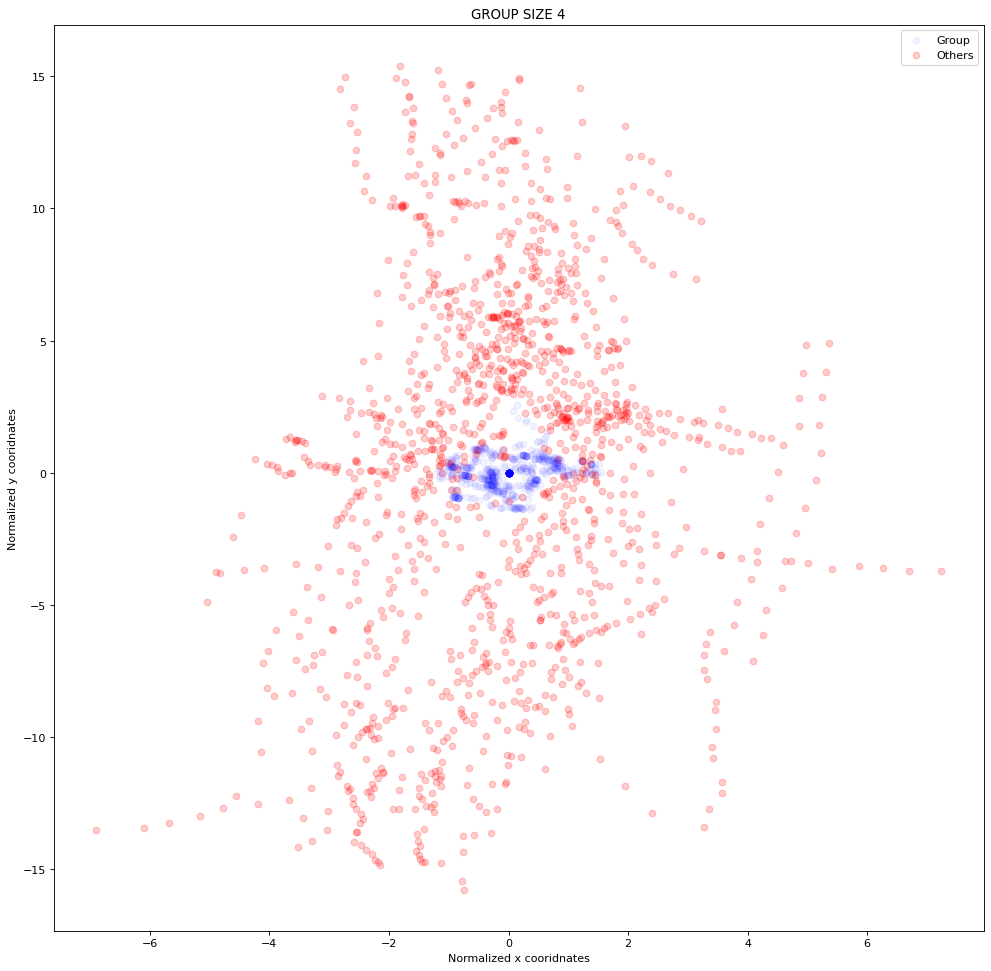

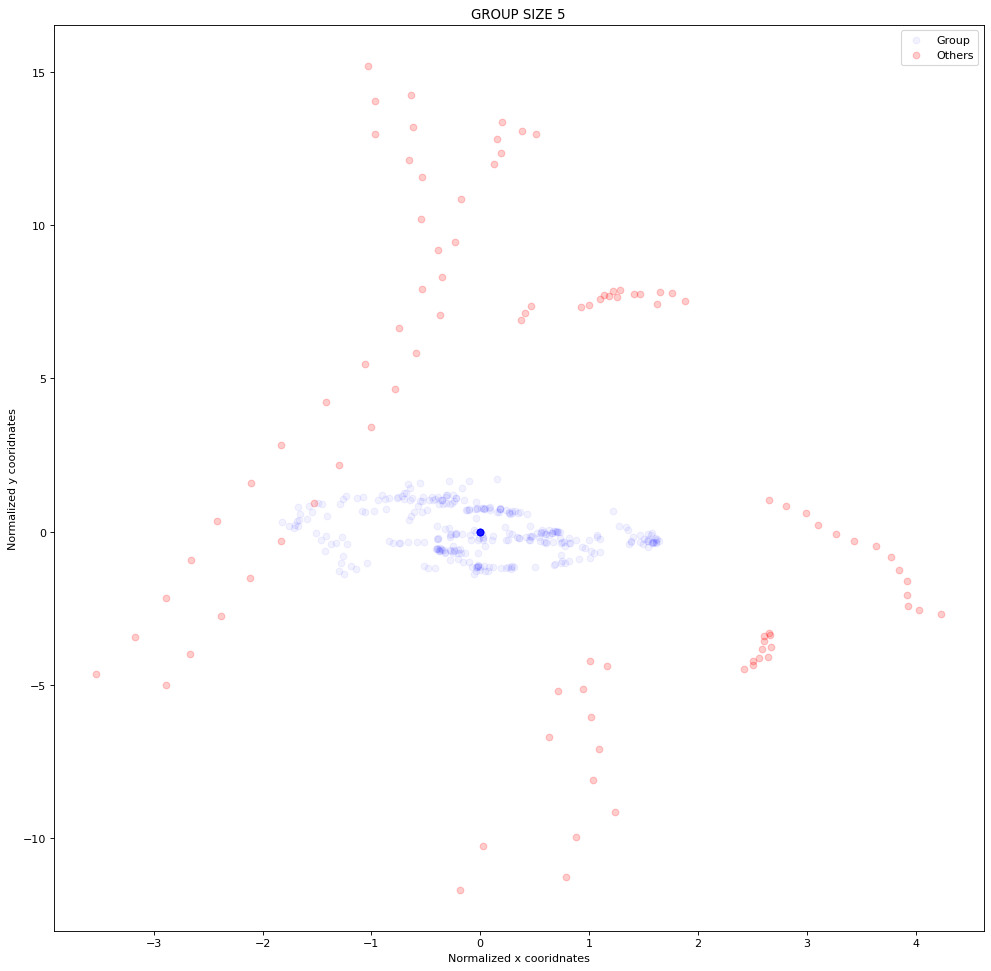

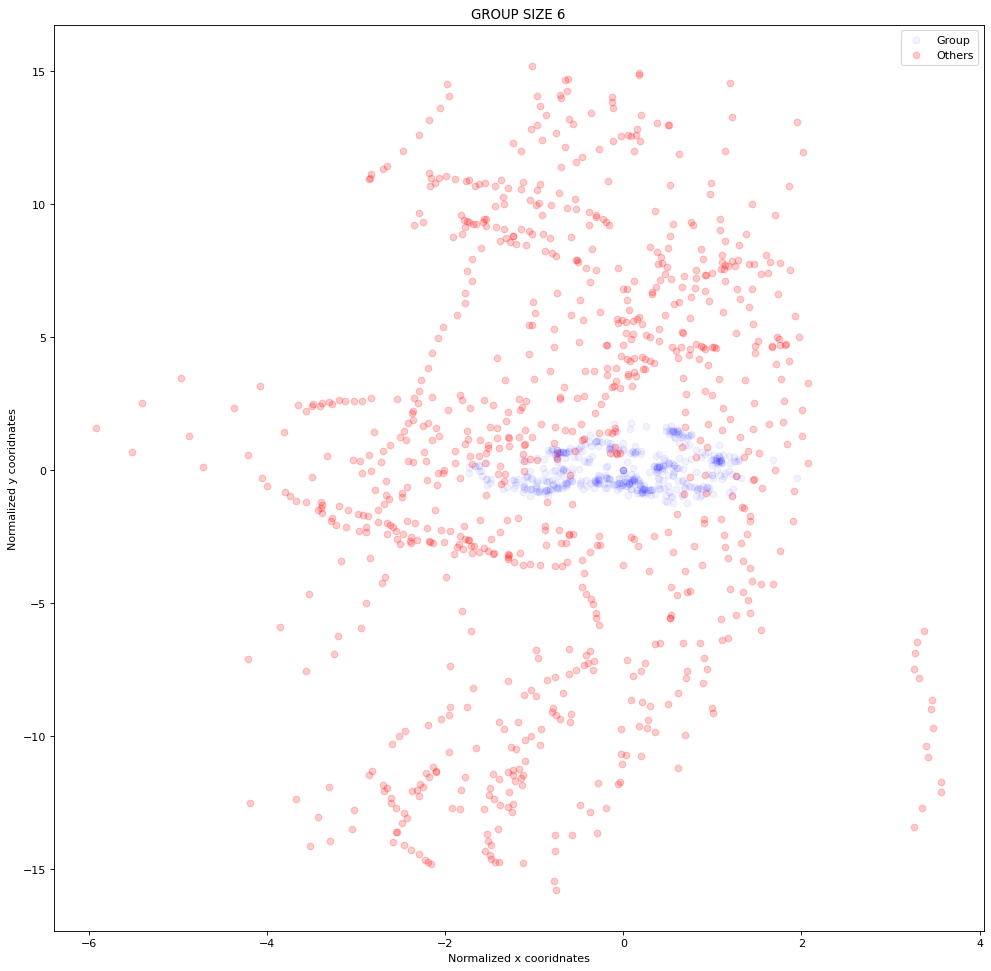

In [22]:
sizes = [0,2,3,4,5,6]

for num in sizes:

    frames = data[data['group_size'] == num]['frame_number'].unique().tolist()
    df = data[data['frame_number'].isin(frames)]
    plt.figure(figsize=(15, 15), dpi=80)
    plt.scatter(df[df['group_size'] == num]['new_pos_y'],df[data['group_size'] == num]['new_pos_x'],c = 'blue', label = 'Group',alpha = 0.05)
    plt.scatter(df[df['group_size'] != num]['dist_y'],df[data['group_size'] != num]['dist_x'],c = 'red', label = 'Others', alpha = 0.2) 
    '''plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
    plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')'''
    
    plt.legend()
    plt.xlabel('Normalized x cooridnates')
    plt.ylabel('Normalized y cooridnates')
    plt.title('GROUP SIZE '+ str(num))
    plt.show()

No handles with labels found to put in legend.


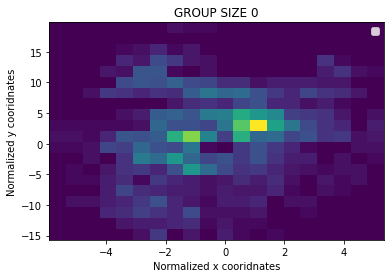

No handles with labels found to put in legend.


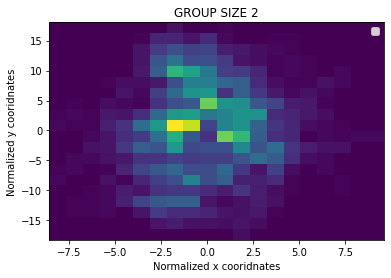

No handles with labels found to put in legend.


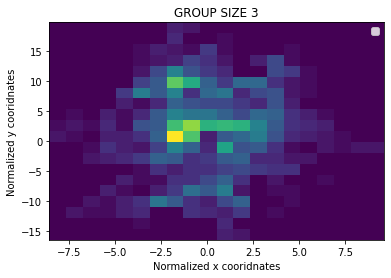

No handles with labels found to put in legend.


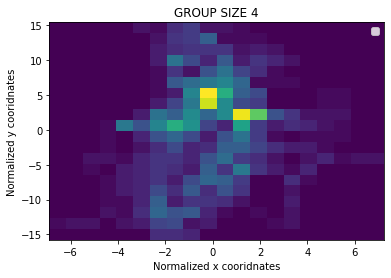

No handles with labels found to put in legend.


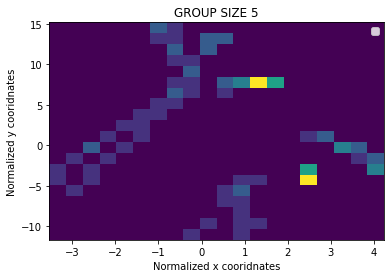

No handles with labels found to put in legend.


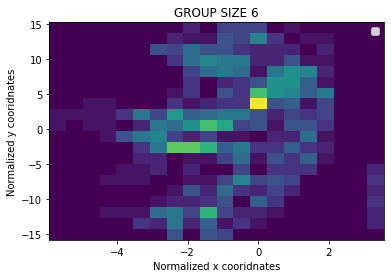

In [23]:
sizes = [0,2,3,4,5,6]

for num in sizes:

    frames = data[data['group_size'] == num]['frame_number'].unique().tolist()
    df = data[data['frame_number'].isin(frames)]
    #plt.hist2d(df[df['group_size'] == num]['new_pos_y'],df[data['group_size'] == num]['new_pos_x'],bins=50, label = 'Group')
    plt.hist2d(df[df['group_size'] != num]['dist_y'][~np.isnan(df[df['group_size'] != num]['dist_y'])],df[data['group_size'] != num]['dist_x'][~np.isnan(df[data['group_size'] != num]['dist_x'])] ,bins=20, label = 'Others') 
    '''plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
    plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')'''
    plt.legend()
    plt.xlabel('Normalized x cooridnates')
    plt.ylabel('Normalized y cooridnates')
    plt.title('GROUP SIZE '+ str(num))
    plt.show()

No handles with labels found to put in legend.


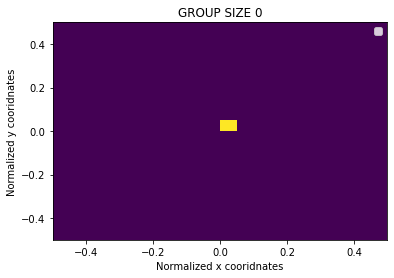

No handles with labels found to put in legend.


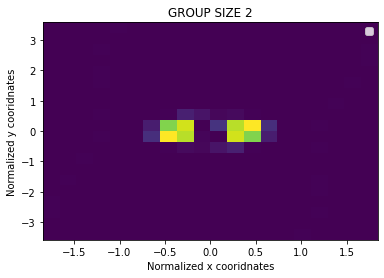

No handles with labels found to put in legend.


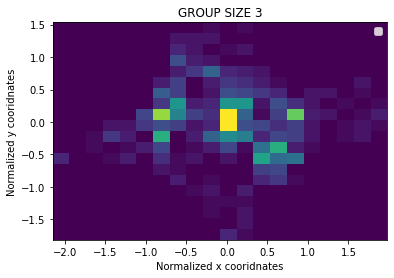

No handles with labels found to put in legend.


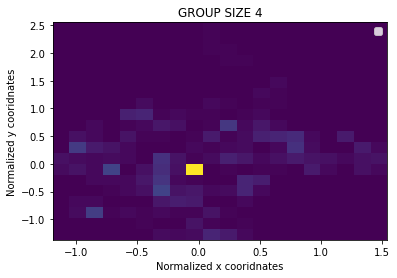

No handles with labels found to put in legend.


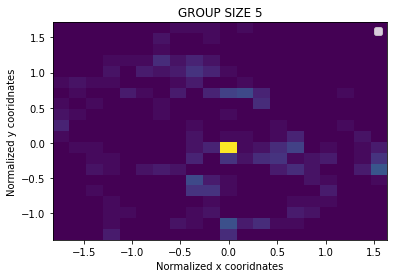

No handles with labels found to put in legend.


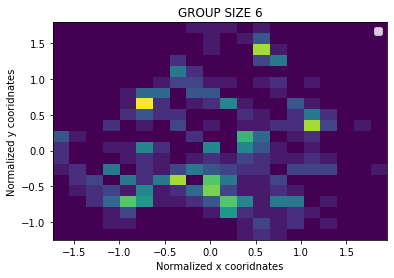

In [24]:
sizes = [0,2,3,4,5,6]

for num in sizes:

    frames = data[data['group_size'] == num]['frame_number'].unique().tolist()
    df = data[data['frame_number'].isin(frames)]
    plt.hist2d(df[df['group_size'] == num]['new_pos_y'],df[data['group_size'] == num]['new_pos_x'],bins=20, label = 'Group')
    #plt.hist2d(df[df['group_size'] != num]['dist_y'][~np.isnan(df[df['group_size'] != num]['dist_y'])],df[data['group_size'] != num]['dist_x'][~np.isnan(df[data['group_size'] != num]['dist_x'])] ,bins=20, label = 'Others') 
    '''plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
    plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')'''
    plt.legend()
    plt.xlabel('Normalized x cooridnates')
    plt.ylabel('Normalized y cooridnates')
    plt.title('GROUP SIZE '+ str(num))
    plt.show()

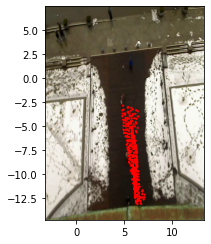

In [25]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("reference.png")

fig, ax = plt.subplots()

im = ax.imshow(im, extent=[-3.28, 13.29, -14.8, 7.45])

ax.plot(data[data['group_number'] == 44]['pos_y'],-data[data['group_number'] == 44]['pos_x'], ls='dotted', linewidth=2, color='red')

#ax.plot(data[data['group_number'] == 4]['pos_y'],-data[data['group_number'] == 4]['pos_x'], ls='dotted', linewidth=2, color='red') 

#ax.plot(data[data['group_number'] == 54]['pos_y'],-data[data['group_number'] == 54]['pos_x'], ls='dotted', linewidth=2, color='red') 
#ax.plot(data[data['group_number'] == 53]['pos_y'],-data[data['group_number'] == 53]['pos_x'], ls='dotted', linewidth=2, color='red')

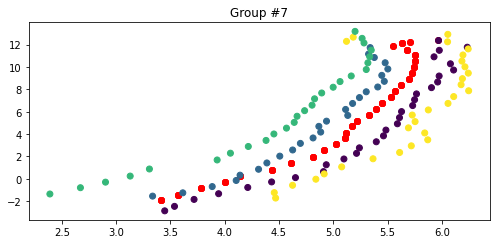

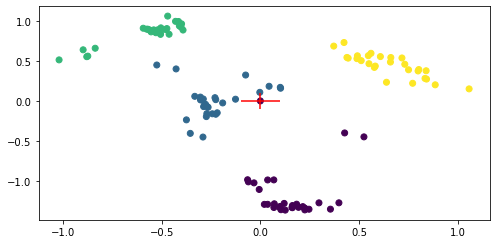

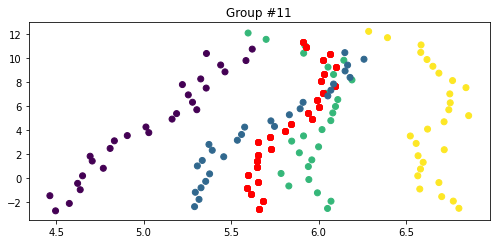

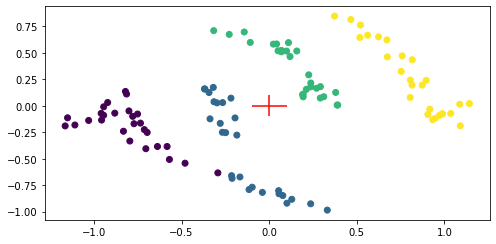

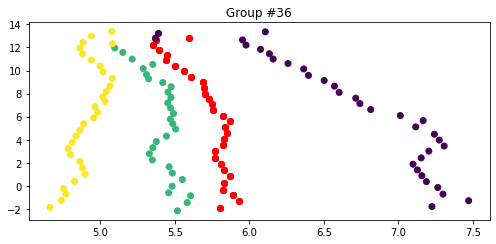

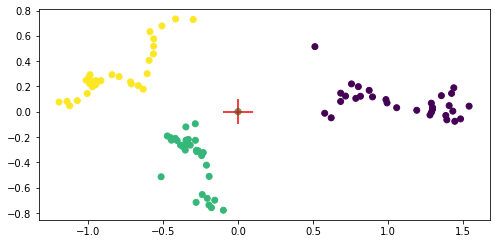

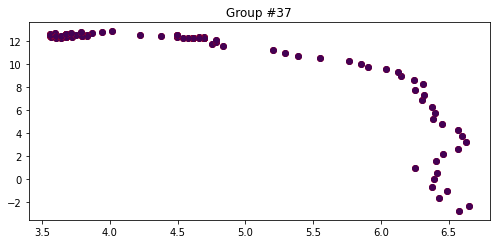

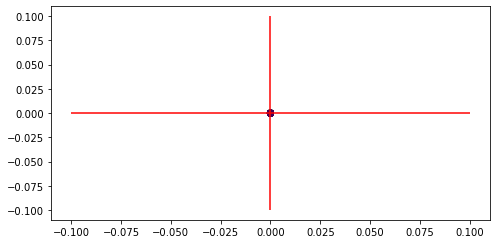

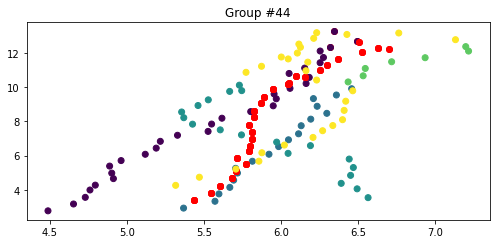

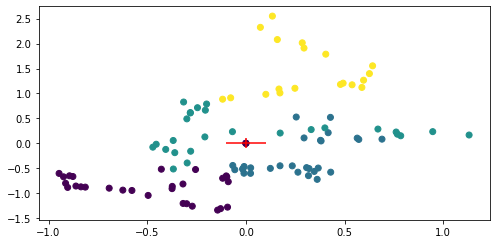

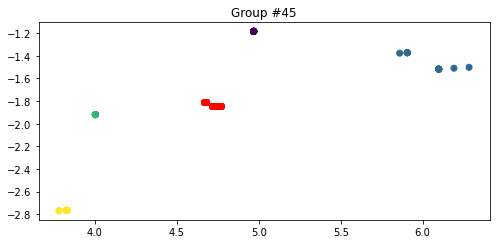

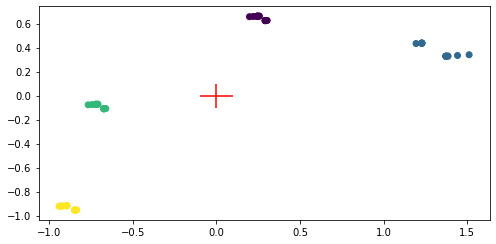

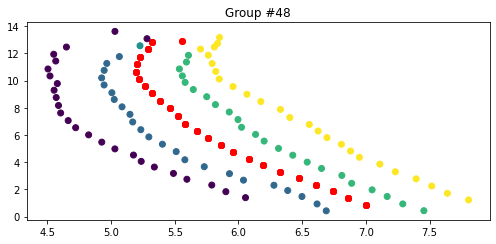

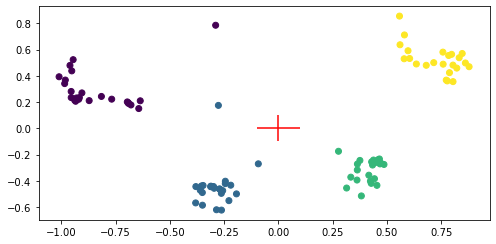

In [26]:
sizes = 4

for num in data[data['group_size'] == sizes]['group_number'].unique().tolist():
    
    
    frames = data[data['group_number'] == num]['frame_number'].unique().tolist()
    for i in frames:
        y = data[(data['group_number'] == num) & (data['frame_number'] == i)]['pos_y'].tolist()
        x = data[(data['group_number'] == num) & (data['frame_number'] == i)]['pos_x'].tolist()
        zx = data[(data['group_number'] == num) & (data['frame_number'] == i)]['centroid_x'].tolist()
        zy = data[(data['group_number'] == num) & (data['frame_number'] == i)]['centroid_y'].tolist()
        plt.scatter(zy,zx, c='red')
        plt.scatter(y,x, c = data[(data['group_number'] == num) & (data['frame_number'] == i)]['pedestrian_ID'].tolist())
    plt.title('Group #'+str(num))
    plt.show()    

    plt.scatter(data[data['group_number'] == num]['new_pos_y'],data[data['group_number'] == num]['new_pos_x'],c = data[data['group_number'] == num]['pedestrian_ID'])
    plt.hlines(y=0,xmin=-0.1,xmax=0.1,color = 'red')
    plt.vlines(x=0,ymin=-0.1,ymax=0.1,color = 'red')

    plt.show()

In [27]:
def plot_max_values(group_number):
    subset = data[data['group_number']==group_number]
    for i in subset['frame_number']:
        max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
        max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
        subset[subset['frame_number'] == i]['pos_x'] = subset[subset['frame_number'] == i]['pos_x']/max_x
        subset[subset['frame_number'] == i]['pos_y'] = subset[subset['frame_number'] == i]['pos_y']/max_y
    plt.scatter(subset['pos_y'],subset['pos_x'])
    
    return()def plot_max_values(group_number):
    subset = data[data['group_number']==group_number]
    for i in subset['frame_number']:
        max_x = np.abs(subset[subset['frame_number'] == i]['dist_x']).max()
        max_y = np.abs(subset[subset['frame_number'] == i]['dist_y']).max()
        subset[subset['frame_number'] == i]['pos_x'] = subset[subset['frame_number'] == i]['pos_x']/max_x
        subset[subset['frame_number'] == i]['pos_y'] = subset[subset['frame_number'] == i]['pos_y']/max_y
    plt.scatter(subset['pos_y'],subset['pos_x'])
    
    return()

SyntaxError: invalid syntax (Temp/ipykernel_18764/957564699.py, line 10)

In [ ]:
df = pd.DataFrame({'A':[61.75, 10.25], 'B':[0.62, 0.45], 'C':[4,5]})

In [ ]:
df

In [ ]:
df['C'] = df[df['C']==4]['A']/61.75

In [ ]:
df